In [279]:

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_wine

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [280]:
#data
data=load_wine(as_frame=True)

#features
df= data.data.copy()

#label in a column called y in df
df["y"]=data.target

df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,y
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [281]:
df.shape

(178, 14)

In [282]:
#How many samples and features are there?

row= df.shape[0]
column= df.shape[1]
print("Number of samples:", row, "\nNumber of features:",column-1)

Number of samples: 178 
Number of features: 13


In [283]:
# How many instances are there for each class? ................Q1

df["y"].value_counts()

1    71
0    59
2    48
Name: y, dtype: int64

In [284]:
# Calculate the means, medians, and standard deviations of each feature
#.............!!!!!we can use this one as well:))
    #df_nolabel = df.iloc[:, :-1].copy()
    #means = df_nolabel.mean(axis=0)
    #medians = df_nolabel.median(axis=0)
    #stdevs = df_nolabel.std(axis=0)
    #vals = np.vstack((means.values, medians.values, stdevs.values))
    #df_comparison = pd.DataFrame(data=vals, index=['mean', 'median', 'stdev'], columns=df_nolabel.columns)
    #df_comparison.............................so fun!!!!!

df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,y
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


<AxesSubplot:>

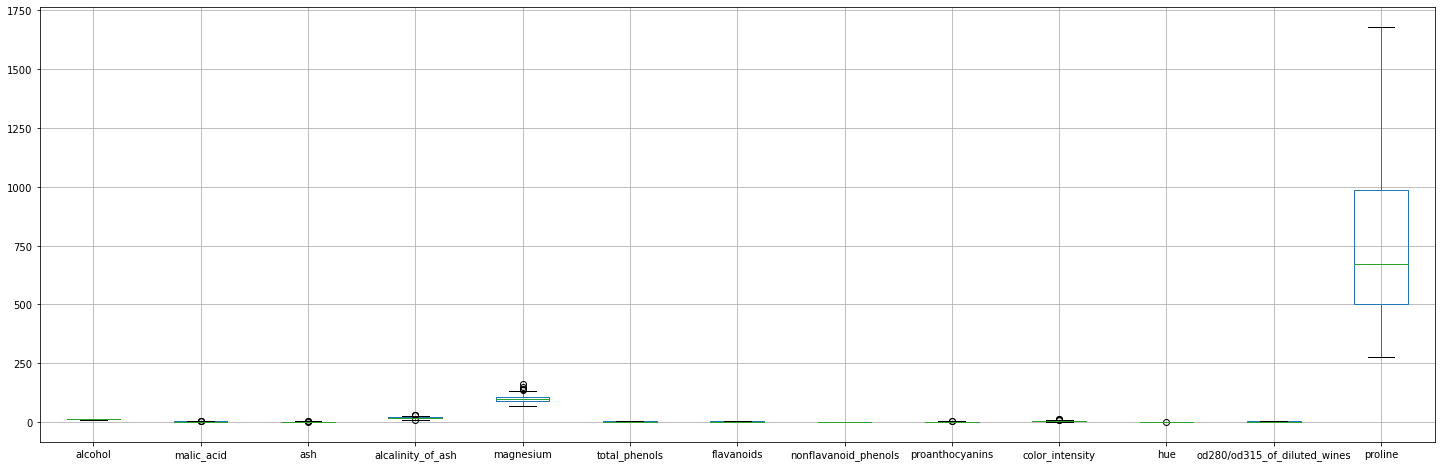

In [285]:
# Plot a boxplot of each feature (NOT THE LABEL!!) (all in one plot -- you can do this with a single line of code).
#: Is there any feature that is in a clearly different scale than the others?........Q2

#we can do:)
#.........!!!!or plt.figure(figsize=(24,6))
#.........!!!!or  sns.boxplot(data=df_nolabel, orient="h")

df.drop(["y"], axis=1).boxplot(figsize=(25,8))

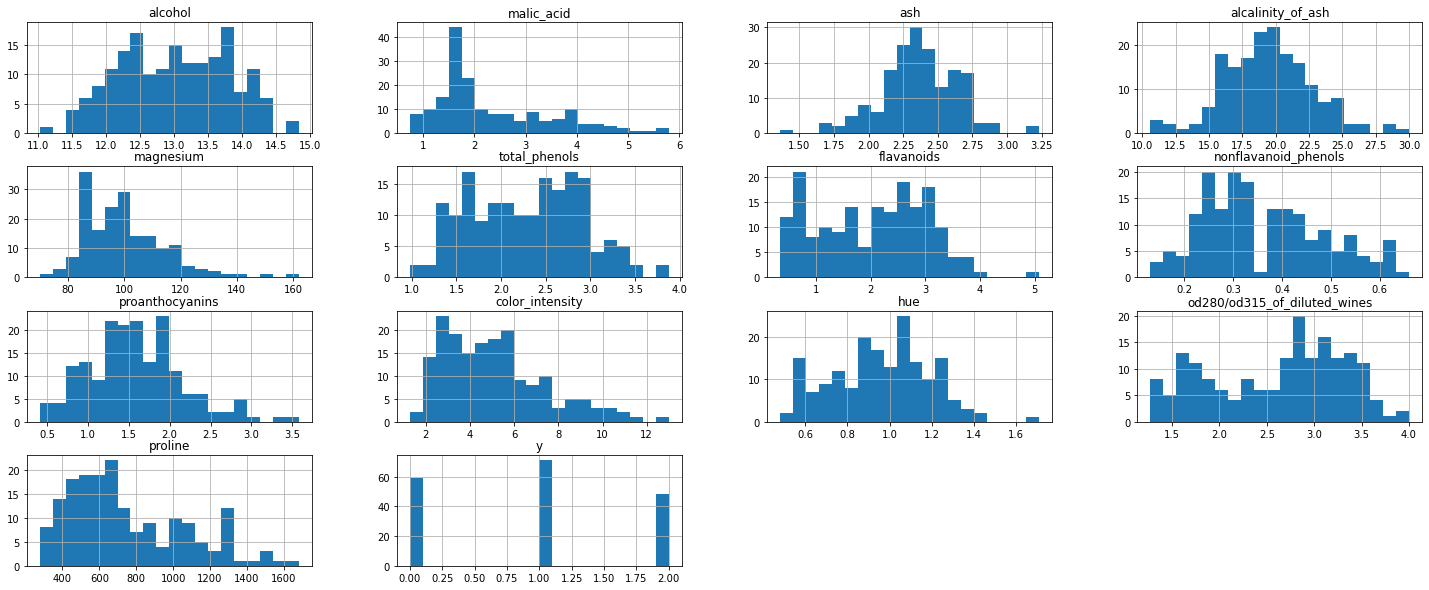

In [286]:
#Let's look at the distributions of values of our features. Draw a histogram for each of the features
his= df.hist(bins=20, figsize=(25,10))

In [287]:
# Calculate the correlations between each pair of variables
df.drop("y",axis=1).corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


<AxesSubplot:>

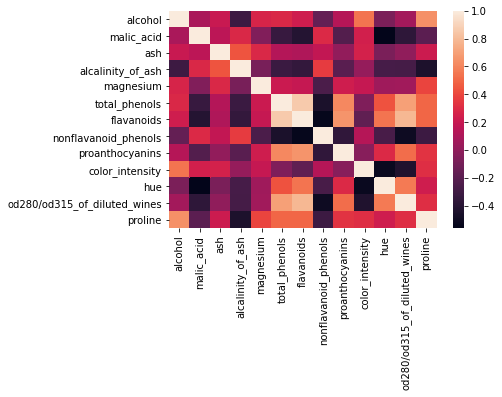

In [288]:
# Plot a heatmap of the correlations between pairs of FEATURES (i.e., don't include the target!)

sns.heatmap(df.drop("y", axis=1).corr())

In [289]:
# What is the highest correlation between features?
print("The highest correlated pair is flavanoids and total_phenols")

The highest correlated pair is flavanoids and total_phenols


In [290]:
from sklearn.compose import ColumnTransformer

In [291]:
# Let's do PCA:

# HINT: I suggest you attempt .....Q5..... of the quiz and then use the function you developed
#       in this and some of the following cells.


# 1. Standardise your data using a StandardScaler. Make sure you're not scaling the 'y'!
df1=df.drop("y", axis=1)
num_features=list(df1.columns)
ColTransformer=  ColumnTransformer([('num', StandardScaler(), num_features)
                                    ],
                                   remainder='passthrough'  # i.e., leave the rest of the columns untouched -- otherwise, they're dropped
                                  )

processed= ColTransformer.fit_transform(df1)
print(processed.shape)


# 2. Do PCA with 2 components. How much variance is retained from the original dataset?

pca_n=PCA(n_components=2)
pca_n1=pca_n.fit_transform(processed)
np.cumsum(pca_n.explained_variance_ratio_)


(178, 13)


array([0.36198848, 0.55406338])

In [292]:
#Q5 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


def std_pca(df, var=0.5):
    y = 0
    if 'y' in df.columns:
        y = 1
        x = df.drop('y',axis=1, inplace=False)
    else:
        x = df.copy()
        
    x_std = StandardScaler().fit_transform(x)
    pca = PCA(n_components=var, random_state=100)
    pca_data = pca.fit_transform(x_std)
    #print(pca_data.shape)
    if y:
        return np.concatenate((pca_data, df['y'].values.reshape(-1, 1)), axis=1)
    return pca_data

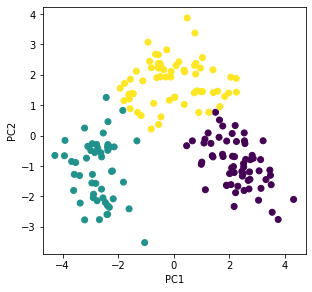

In [293]:
# Plot your two components, using the label from the data to colour the points
plt.figure(figsize=(16,10))
for i in range(1,2):
    plt.subplot(2,3,i)
    plt.scatter(pca_n1[:, i-1], pca_n1[:, i], c=kmeans.labels_)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    
    plt.savefig("PCA", dpi=300)
plt.show()

In [303]:
# How many components do you need to keep at least 85% of the variance in the dataset? ....Q6

pca_n=PCA(n_components=0.85)
pca_n1=pca_n.fit_transform(processed)
np.cumsum(pca_n.explained_variance_ratio_)


array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116])

In [304]:
# How much variance is retained if we do PCA with 3 components?.....Q7

pca_n=PCA(n_components=3)
pca_n1=pca_n.fit_transform(processed)
np.cumsum(pca_n.explained_variance_ratio_)


array([0.36198848, 0.55406338, 0.66529969])

Clustering

In [296]:
#Let's see how many clusters does K-Means find.
# Use the elbow method to select the number of clusters in your data using 3 PCs.
inertias, sil=[], []
for k in range(1,12):
    kmeans=KMeans(n_clusters=k)
    y_pred=kmeans.fit_predict(pca_n1)
    inertias.append(kmeans.inertia_)
    if k>1:
        sil.append(silhouette_score(pca_n1, y_pred))


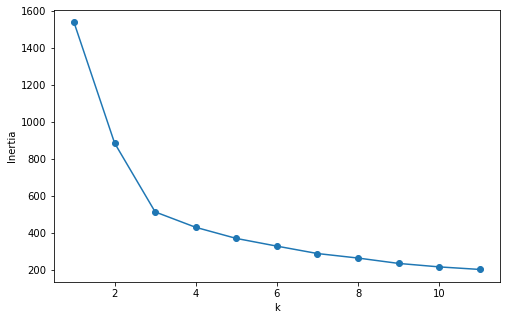

In [297]:
# Let's plot inertia vs number of clusters

plt.figure(figsize=(8,5))
plt.plot(range(1,12), inertias, "o-" )
plt.xlabel("k")
plt.ylabel("Inertia")
plt.show()


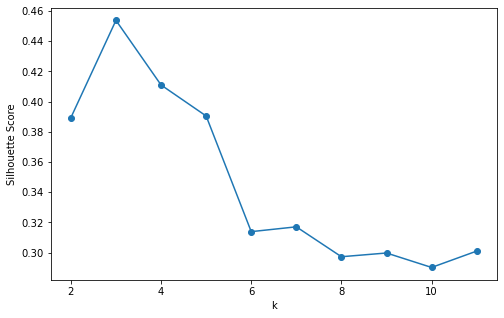

In [298]:
# Now use the silhouette score to choose between the two candidate k values from the previous cell

plt.figure(figsize=(8,5))
plt.plot(range(2, 12), sil, 'o-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.show()

In [299]:
# Visualise the first two pcs (using a scatterplot) using the labels from KMeans with your chosen value of k

k=3
kmeans=KMeans(n_clusters=3)
y_pred= kmeans.fit_predict(pca_n1)

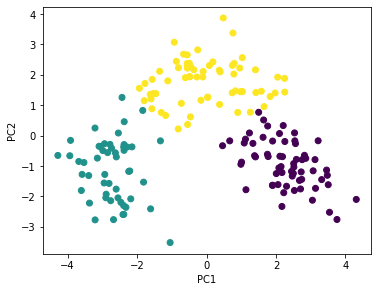

In [300]:
#plot

plt.figure(figsize=(20,10))
for i in range(1,2):
    plt.subplot(2,3,i)
    plt.scatter(pca_n1[:, i-1], pca_n1[:, i], c=kmeans.labels_ )
    plt.xlabel("PC1")
    plt.ylabel("PC2")
   
    plt.savefig("PCA_cluster", dpi=300)
plt.show()
    

Now we can try to understand our clusters.

In [301]:
# In the original (before PCA and before standardisation) dataframe, add a column called 'cluster' that contains
# the cluster assignment from above

original = data.data.copy()
original['cluster'] =y_pred #kmeans.labels_
original



,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,cluster
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,1
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,1
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,1
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,1


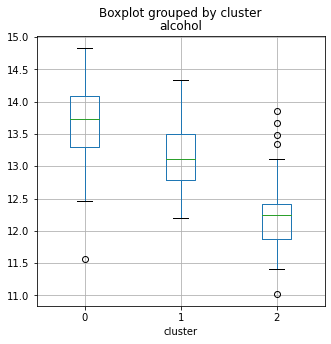

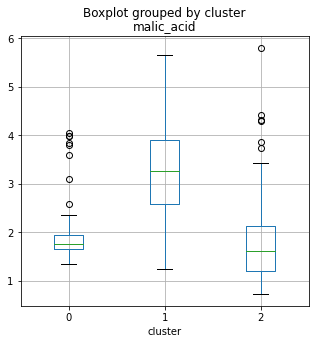

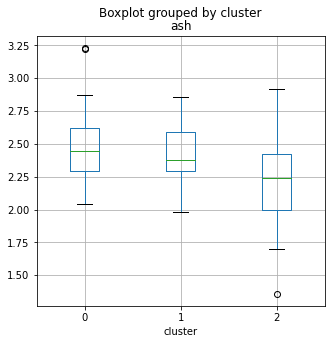

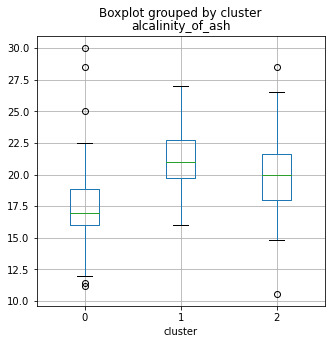

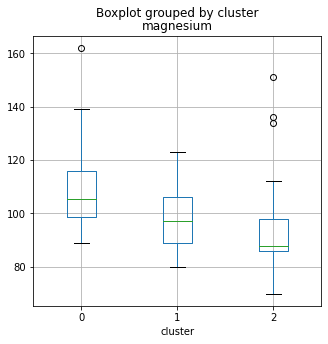

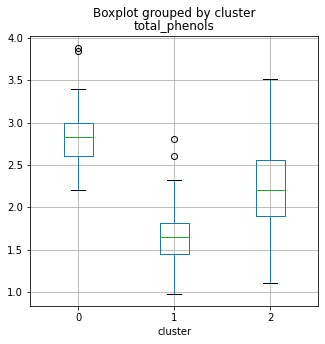

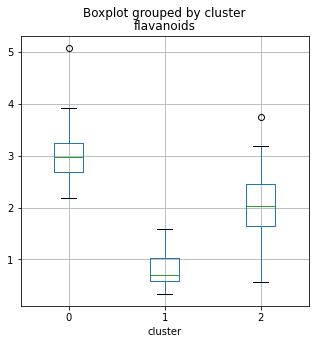

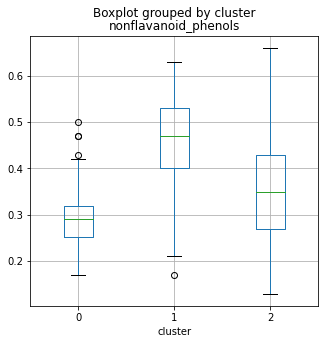

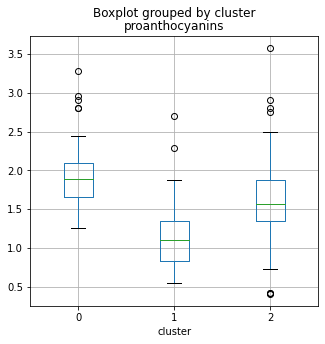

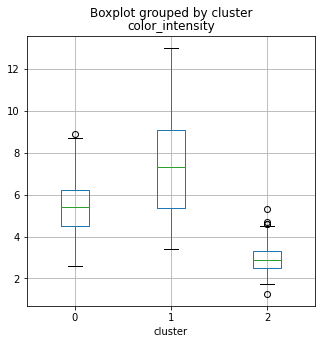

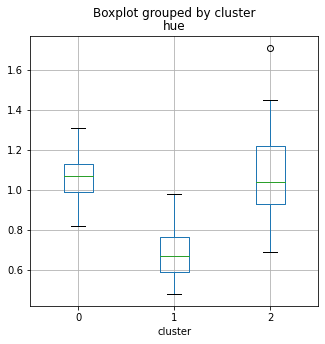

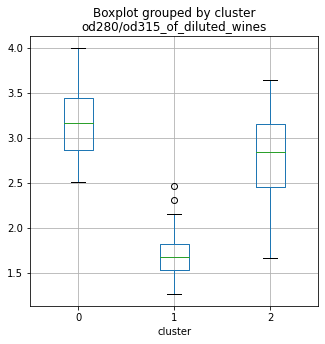

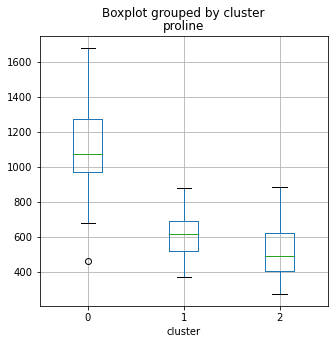

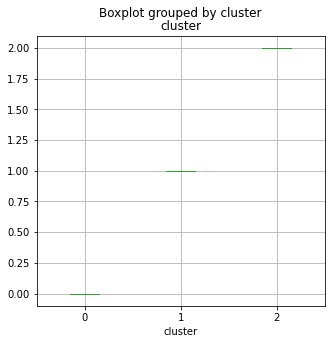

In [302]:
# Do a boxplot of each feature, separating between clusters

column=list(original.columns)
for i in column:
    boxplot= original.boxplot(column=i, by="cluster", figsize=(5,5))